<a href="https://colab.research.google.com/github/nchaudhary1/BaggingandboostingEnsemble/blob/main/Mobile_final46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
#Importing the libraries 
import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

data = pd.read_csv('/content/drive/MyDrive/talking_data.csv')
data.tail(15)


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
99985,61500,3,1,10,280,2017-11-09 01:50:53,NaN,0
99986,119614,2,1,19,219,2017-11-07 11:27:54,NaN,0
99987,41851,11,1,28,319,2017-11-08 13:19:42,NaN,0
99988,69449,6,1,13,125,2017-11-09 13:53:30,NaN,0
99989,92730,3,1,19,379,2017-11-07 11:02:08,NaN,0
99990,84388,9,1,22,107,2017-11-09 04:21:28,NaN,0
99991,43374,1,1,18,134,2017-11-09 12:42:34,NaN,0
99992,125061,12,1,13,328,2017-11-07 09:33:14,NaN,0
99993,146258,3,1,13,280,2017-11-09 03:03:17,NaN,0
99994,147153,13,1,13,477,2017-11-07 07:34:13,NaN,0


In [93]:
#Showing the datatypes of the columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [94]:
#Getting the descriptive analysis(Summary of the data)
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [95]:
#Checking for any missing values
miss_val = data.isna().sum()
miss_val

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [96]:
#Getting the value count of the ip column
print(data.ip.value_counts())


5348      669
5314      616
73487     439
73516     399
53454     280
         ... 
109522      1
140527      1
351154      1
195068      1
185961      1
Name: ip, Length: 34857, dtype: int64


In [97]:
#Getting the value count of the app column
print(data.app.value_counts())


3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
145        1
97         1
96         1
267        1
261        1
Name: app, Length: 161, dtype: int64


In [98]:
#Getting the value count of the device column
data.device.value_counts()

1       94338
2        4345
0         541
3032      371
3543      151
        ...  
374         1
76          1
3282        1
129         1
241         1
Name: device, Length: 100, dtype: int64

In [99]:
#Getting the value count of the os column
data.os.value_counts()

19     23870
13     21223
17      5232
18      4830
22      4039
       ...  
153        1
142        1
151        1
113        1
193        1
Name: os, Length: 130, dtype: int64

In [100]:
#Getting the value count of the channel column
data.channel.value_counts()

280    8114
245    4802
107    4543
477    3960
134    3224
       ... 
114       1
474       1
261       1
465       1
4         1
Name: channel, Length: 161, dtype: int64

In [101]:
#Getting the value count of the click_time column
data.click_time.value_counts()

2017-11-08 12:01:02    7
2017-11-07 05:00:11    6
2017-11-09 14:46:23    6
2017-11-07 04:36:16    6
2017-11-08 13:32:05    6
                      ..
2017-11-07 08:31:55    1
2017-11-08 23:35:15    1
2017-11-08 10:01:33    1
2017-11-09 11:01:52    1
2017-11-09 13:25:41    1
Name: click_time, Length: 80350, dtype: int64

In [102]:
#getting the value count of the attributed_time column
data.attributed_time.value_counts()

2017-11-08 02:22:38    1
2017-11-09 14:22:16    1
2017-11-08 04:35:54    1
2017-11-08 06:19:51    1
2017-11-09 08:57:08    1
                      ..
2017-11-07 08:08:09    1
2017-11-09 10:47:54    1
2017-11-09 11:50:42    1
2017-11-08 15:26:07    1
2017-11-08 15:09:40    1
Name: attributed_time, Length: 227, dtype: int64

In [103]:
#Getting the value count of the is_attributed column
data.is_attributed.value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [104]:
#find the number of unique values in each column
count = data.nunique(axis = 0)
count
  

ip                 34857
app                  161
device               100
os                   130
channel              161
click_time         80350
attributed_time      227
is_attributed          2
dtype: int64

In [105]:
max_count = max(count)
max_count
  

80350

In [106]:
max_unique_column = data.columns[count == max_count]
max_unique_column
print('The column with maximum number of unique values is',max_unique_column)

The column with maximum number of unique values is Index(['click_time'], dtype='object')


In [107]:

for i in count:
  max1 = count.max()
  if i == max1:
    print(i)
  

80350


In [108]:
max_unique = count.max()
if max_unique == count['ip']:
  print('ip has the max unique values',count['ip'])
elif max_unique == count['app']:
  print('app has the max unique values',count['app'])
elif max_unique == count['device']:
  print('device has the max unique values',count['device'])
elif max_unique == count['os']:
  print('os has the max unique values',count['os'])
elif max_unique == count['channel']:
  print('channel has the max unique values',count['channel'])
elif max_unique == count['click_time']:
  print('click_time has the max unique values',count['click_time'])
elif max_unique == count['attributed_time']:
  print('attributed_time has the max unique values',count['attributed_time'])
elif max_unique == count['is_attributed']:
  print('is_attributed has the max unique values',count['is_attributed'])

click_time has the max unique values 80350


In [109]:
#getting the column names of the dataset
data.columns.values

array(['ip', 'app', 'device', 'os', 'channel', 'click_time',
       'attributed_time', 'is_attributed'], dtype=object)

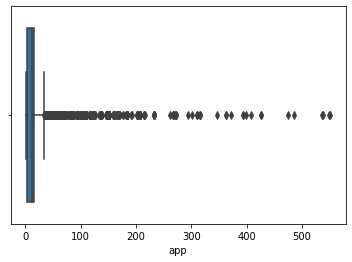

In [110]:
sns.boxplot(data['app'])

In [111]:
#Grouping the dataset where the app column contains more than 20% of clicks
apps = data.groupby('app').size().reset_index(name='count')
apps = apps[apps['count']>apps['count'].quantile(0.80)]
apps = apps.merge(data, on= 'app',how = 'inner')
apps.tail()

,app,count,ip,device,os,channel,click_time,attributed_time,is_attributed
98972,151,109,26762,0,0,347,2017-11-07 11:03:36,NaN,0
98973,151,109,86767,0,24,347,2017-11-08 05:19:23,NaN,0
98974,151,109,81674,0,0,347,2017-11-08 04:31:22,NaN,0
98975,151,109,147113,0,38,347,2017-11-08 11:05:23,NaN,0
98976,151,109,147065,0,0,347,2017-11-07 04:42:09,NaN,0


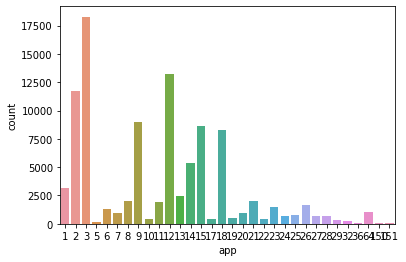

In [112]:
#sns plot of the apps dataset based on the grouping by app
sns.countplot(apps.app)

In [113]:
apps['count'].value_counts()

18279    18279
13198    13198
11737    11737
8992      8992
8595      8595
8315      8315
5359      5359
3135      3135
2422      2422
2004      2004
1979      1979
1927      1927
1633      1633
1454      1454
1303      1303
1079      1079
981        981
911        911
804        804
720        720
704        704
696        696
478        478
388        388
386        386
380        380
360        360
286        286
188        188
109        109
102        102
73          73
Name: count, dtype: int64

In [114]:
#converting the datatime column to individual column with day, month, year and hour
from datetime import datetime
data['click_time'] = pd.to_datetime(data.click_time)
data.info()
data.head()
data['Month'] = pd.DatetimeIndex(data['click_time']).month
data['Year'] = pd.DatetimeIndex(data['click_time']).year
data['Day'] = pd.DatetimeIndex(data['click_time']).day
data['Hour'] = pd.DatetimeIndex(data['click_time']).hour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  227 non-null     object        
 7   is_attributed    100000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 6.1+ MB


In [115]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  227 non-null     object        
 7   is_attributed    100000 non-null  int64         
 8   Month            100000 non-null  int64         
 9   Year             100000 non-null  int64         
 10  Day              100000 non-null  int64         
 11  Hour             100000 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 9.2+ MB


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,Month,Year,Day,Hour
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,11,2017,7,9
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,11,2017,7,13
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,11,2017,7,18
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,11,2017,7,4
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,11,2017,9,9


In [116]:
#Dropping the columns that has bareluy any effect on the app downloads
data.drop(columns = ['click_time','attributed_time','Month','Year'], inplace = True)
data.head()

,ip,app,device,os,channel,is_attributed,Day,Hour
0,87540,12,1,13,497,0,7,9
1,105560,25,1,17,259,0,7,13
2,101424,12,1,19,212,0,7,18
3,94584,13,1,13,477,0,7,4
4,68413,12,1,1,178,0,9,9


In [117]:
data.isna().sum()

ip               0
app              0
device           0
os               0
channel          0
is_attributed    0
Day              0
Hour             0
dtype: int64

In [118]:
data.is_attributed.value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [119]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data)
data = pd.DataFrame(min_max_scaler.transform(data))
columns_name = ['ip','app','device','os','channel','is_attributed','Day','Hour']
data.columns = columns_name
data.head()


,ip,app,device,os,channel,is_attributed,Day,Hour
0,0.239977,0.020000,0.000259,0.015012,0.997980,0.0,0.333333,0.391304
1,0.289381,0.043636,0.000259,0.019630,0.517172,0.0,0.333333,0.565217
2,0.278041,0.020000,0.000259,0.021940,0.422222,0.0,0.333333,0.782609
3,0.259289,0.021818,0.000259,0.015012,0.957576,0.0,0.333333,0.173913
4,0.187538,0.020000,0.000259,0.001155,0.353535,0.0,1.000000,0.391304


In [120]:
#Find the corelation
corr = data.corr()
corr

,ip,app,device,os,channel,is_attributed,Day,Hour
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955,0.057067,-0.007955
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426,-0.032182,0.026079
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695,-0.040110,0.012035
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183,-0.031336,0.014660
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336,0.000265,-0.021326
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000,-0.000603,-0.002944
Day,0.057067,-0.032182,-0.040110,-0.031336,0.000265,-0.000603,1.000000,-0.274896
Hour,-0.007955,0.026079,0.012035,0.014660,-0.021326,-0.002944,-0.274896,1.000000


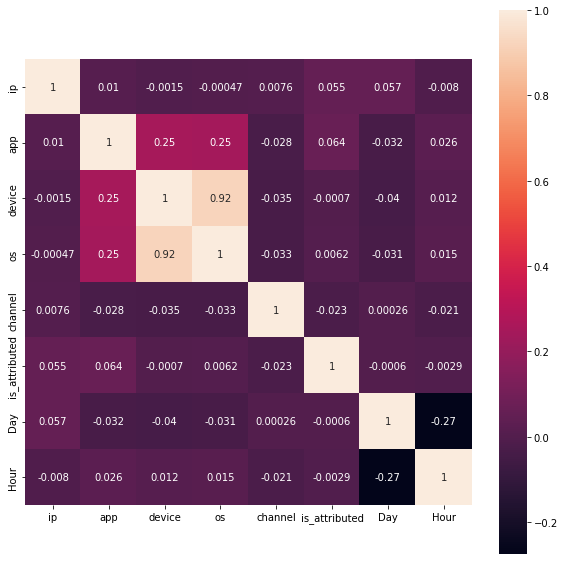

In [121]:
#Plot the correlation
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot= True,square = True)

In [122]:
data.is_attributed.value_counts()

0.0    99773
1.0      227
Name: is_attributed, dtype: int64

In [123]:
from sklearn.model_selection import train_test_split
X =data.drop('is_attributed', axis = 'columns')
Y = data['is_attributed']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 10)

In [124]:
Y_test.mean()

0.00195

In [125]:
Y_train.mean()

0.00235

In [126]:
from xgboost import XGBClassifier
xgbc  = XGBClassifier()
xgbc.fit(X_train, Y_train)


XGBClassifier()

In [127]:
y_pred = xgbc.predict(X_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [128]:
from sklearn.metrics import accuracy_score
accuracy_scor = accuracy_score(y_pred,Y_test)
accuracy_scor

0.99815

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, Y_test)
cm

array([[19961,    37],
       [    0,     2]])

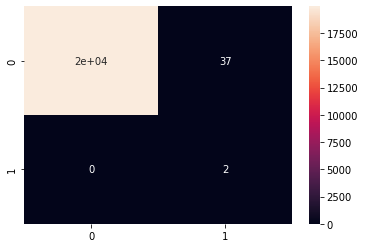

In [130]:
sns.heatmap(cm, annot = True)

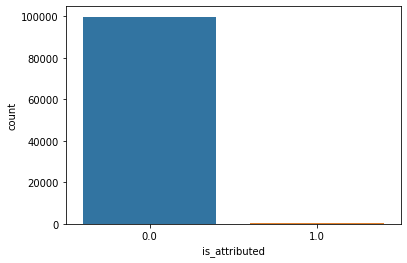

In [131]:
sns.countplot(data.is_attributed)

In [132]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_sm, Y_sm = sm.fit_resample(X,Y)

In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm,Y_sm, test_size = 0.20, random_state = 10)

In [134]:
xgbc_after_smote = xgbc.fit(X_train, Y_train)
xgbc_after_smote

XGBClassifier()

In [135]:
Y_sm.value_counts()

0.0    99773
1.0    99773
Name: is_attributed, dtype: int64

In [136]:
predictions = xgbc.predict(X_test)
predictions

array([0., 0., 1., ..., 1., 1., 1.])

In [137]:
accuracy = accuracy_score(Y_test,predictions)
accuracy

0.968454021548484

In [138]:
cm1 = confusion_matrix(predictions, Y_test)
cm1

array([[19416,   774],
       [  485, 19235]])

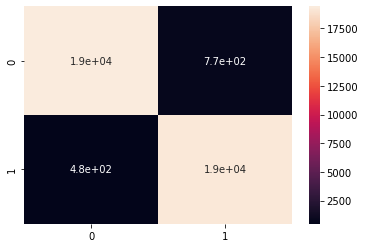

In [139]:
sns.heatmap(cm1, annot = True)

In [140]:
predictions[:10]

array([0., 0., 1., 0., 1., 0., 1., 1., 0., 1.])

In [141]:
# auc scores
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(Y_test, predictions)
print(auc_score1)

0.9684733862626499


In [142]:
#Apply BaggingClassifier with base_estimator LogisticRegression and compute AUC/ROC score.
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, Y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, Y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))

The Bagging classifier model accuracy is 0.9971435730393385


Feature: 0, Score: 0.17390
Feature: 1, Score: 0.36211
Feature: 2, Score: 0.16345
Feature: 3, Score: 0.08567
Feature: 4, Score: 0.11236
Feature: 5, Score: 0.04404
Feature: 6, Score: 0.05846


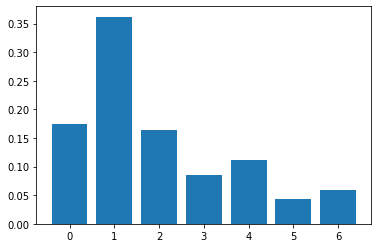

In [143]:
#Compute feature importance score and name the top 5 features/columns 
importance =xgbc_after_smote.feature_importances_
from matplotlib import pyplot
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [144]:
print('On the basis of AUC/ROC score I would chose the BaggingClassifier model because the AUC score is higher for this model which suggests it is better at predicting.')

On the basis of AUC/ROC score I would chose the BaggingClassifier model because the AUC score is higher for this model which suggests it is better at predicting.
